# AMAZON FINE FOOD REVIEWS VISUALIZATION

Data Source **[https://www.kaggle.com/snap/amazon-fine-food-reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews)**

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.It consist of data collected from past many years. This dataset consist of approx 550k reviews. 

![Amazon Fine Food Reviews](https://datascienceplus.com/wp-content/uploads/2017/09/amazon-Fine-Food-Reviews.png)

## SNIPPET
1. Converted the reviews using NLP techniques i.e BOW, tf-IDF, Word2Vec.
2. Visualized the polarity of text using t-SNE.
3. Conclusion based on the visualization.

## DATA INFORMATION
* Number of reviews: 568,454
* Number of users: 256,059
* Number of products: 74,258
* Timespan: Oct 1999 - Oct 2012
* Number of Attributes/Columns in data: 10 

## ATTRIBUTE INFORMATION

1.  Id
2.  ProductId - unique identifier for the product
3.  UserId - unqiue identifier for the user
4.  ProfileName
5.  HelpfulnessNumerator - number of users who found the review helpful
6.  HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7.  Score - rating between 1 and 5
8.  Time - timestamp for the review
9.  Summary - brief summary of the review
10. Text - text of the review

## OBJECTIVE
Visualize the polarity of reviews on all four NLP techniques using t-SNE. 

## LOAD THE DATA

In [1]:
# importing the necessary libraries 
import sqlite3
import pandas as pd

In [3]:
con = sqlite3.connect('./database.sqlite') # making a connection with sqlite

""" Assembling data from Reviews where score is not 3 as 3 will be a neutral score so we cant decide the polarity
 based on a score of 3.here, score of 1&2 will be considered as negative whereas score of 4&5 will be considered as 
     positive.
"""
filtered_data = pd.read_sql_query(""" 
SELECT *
FROM Reviews
WHERE Score != 3
""", con) 

# function to map the polarity

def polarity(x):
    if x < 3:
        return 'negative'
    return 'positive'

actualScore = filtered_data['Score']
positiveNegative = actualScore.map(polarity) 
filtered_data['Score'] = positiveNegative

In [4]:
# getting dimension of uncleaned data.
filtered_data.shape

(525814, 10)

In [5]:
# displaying some content of the data.
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## DATA CLEANING
![](http://www.whynotmedia.com.au/images/post-it-note.jpg)

Some of the users have the same time stamp for different products but it can't be possible. They are showing the review given to a product on the different variations of that product also.

In [6]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


Now, we will sort the data according to productId's and then delete all the occurences by only keeping the first occurence.

In [7]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [8]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

#### DATA PRESERVATION

In [10]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25890143662969

The above result shows that approx 69% of the data is preserved and 31% of the data is deleted which is duplicate.

In some reviews it is seen that the Helpfulness numerator is greater than Helpfulness denominator. But it can't be possible so we have to remove those reviews.  

In [11]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


Taking only those reviews in which Helpfulness numerator is less than Helpfulness denominator. 

In [12]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

#### CHECKING SHAPE AND FREQUENCY OF POLARITY

In [13]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(364171, 10)


positive    307061
negative     57110
Name: Score, dtype: int64

## Text Preprocessing: Stemming, stop-word removal and Lemmatization.
![](https://i.ytimg.com/vi/P2PMgnQSHYQ/maxresdefault.jpg)

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and Visualization.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

### 1. HTML TAGS 
Data contains HTML tags which should be cleaned before going furthur, it is an important part Text processing. 

In [15]:
import re
# find sentences containing HTML tags
i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;    

6
I set aside at least an hour each day to read to my son (3 y/o). At this point, I consider myself a connoisseur of children's books and this is one of the best. Santa Clause put this under the tree. Since then, we've read it perpetually and he loves it.<br /><br />First, this book taught him the months of the year.<br /><br />Second, it's a pleasure to read. Well suited to 1.5 y/o old to 4+.<br /><br />Very few children's books are worth owning. Most should be borrowed from the library. This book, however, deserves a permanent spot on your shelf. Sendak's best.


In [22]:
# importing the required libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


### 2. STOP WORDS 
These are also the main part in processing of text these are some words which are not required in our text as they will not make any difference, so we must remove them but there are some words which can can change the meaning of the review eg. 'not'. Therefore we have to decide which stop words are to be removed.  

In [23]:
stop = set(stopwords.words('english')) #set of stopwords
print(stop)

{'what', 'ours', 'their', 'against', 'below', 'too', 'if', 'than', 'into', 'to', 'was', 'should', 'there', 'an', 'then', 'some', 'not', 'this', 'both', 'o', 'theirs', 'or', 'he', 'themselves', 'they', 'before', 't', 'further', 'now', 'other', 'does', "should've", 'are', 've', "doesn't", 'being', 'won', 're', "aren't", 'aren', 'just', "weren't", 'whom', 'how', "she's", 'who', 'you', 'had', 'once', 'ma', 'at', 'above', 'most', 'until', 'have', "mustn't", 'do', 'as', 'wouldn', 'its', 'your', "don't", 'on', 'such', 'himself', 'from', 'am', 'didn', 'ain', 'of', 'only', 'her', 'hers', 'any', "hasn't", 'those', 'ourselves', 'him', 'where', 'yourself', 'hasn', 'i', "didn't", 'between', 'y', "hadn't", 'why', 'having', 'we', "won't", "you'll", 's', 'needn', "shan't", 'because', 'after', 'been', 'the', 'again', 'can', 'here', "shouldn't", 'mightn', 'these', "needn't", 'about', 'nor', 'our', 'will', "couldn't", 'haven', 'doing', 'did', "you're", 'out', 'yours', 'that', 'couldn', 'over', 'and', 'my

### 3. PUNCTUATIONS

In [24]:
stop = ['their', 'isn', 'such', 'where', 'this', 'they', 'while', 'about', 'there', 'myself', 'from', 'mightn', 'was', 'between', 'who', 'are', 'only', 'our', 'those', 'through', 'any', 'is', 'a', 'nor', 'mustn', 'shouldn', 'yourself', 'no', 'itself', 'that', 'himself', 'out', 'what', 'my', 'against', 'below', 's', 'for', 'be', 'into', 'few', 'needn', 'you', 'aren', 'when', 'all', 'him', 'but', 've', 'yours', 'being', 'why', 'own', 'up', 'whom', 're', 'and', 'she', 'me', 'of', 'than', 'doesn', 'both', 'same', 'too', 'am', 'how', 'her', 'd', 'until', 'o', 'your', 'yourselves', 'by', 'other', 'once', 'an', 'just', 'to', 'these', 'don', 'its', 'haven', 'having', 'some', 'shan', 'theirs', 'under', 'we', 'ain', 'it', 'at', 'in', 'y', 'the', 'off', 'herself', 'down', 'because', 'i', 'now', 'themselves', 'each', 'or', 'were', 'if', 'can', 'did', 'm', 'which', 'couldn', 'ourselves', 'hadn', 'has', 'wasn', 'with', 'here', 'further', 'them', 'hasn', 'should', 'ma', 'then', 'he', 'above', 'been', 'didn', 'during', 'most', 'hers', 'will', 'have', 'doing', 'again', 'had', 'do', 'before', 'as', 'wouldn', 'his', 'after', 'ours', 'does', 'so', 'on', 'more', 't', 'won', 'weren', 'over', 'll']
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [28]:
# printing the root word of deicious and tasty with the help of stemming.
print(sno.stem('delicious'))
print(sno.stem('tasty'))

delici
tasti


In [29]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [30]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 

In [31]:
final.head(3) #below the processed review can be seen in the CleanedText Column

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...


### STORING THE CLEANED DATA 

In [32]:
# storing final into an SQlLite table for future.
conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviews', conn, flavor=None, schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

### SAMPLING THE DATA 

In [33]:
data=final.sample(15000)

In [34]:
# Frequency of the polarity. 
data['Score'].value_counts()

positive    12647
negative     2353
Name: Score, dtype: int64



# NATURAL LANGUAGE PROCESSING
![](https://cdn-images-1.medium.com/max/776/1*wXIDeIXrrF5biTTNYzeXTg.jpeg)

##  BASIC NLP TECHNIQUES

### 1. BOW
### 2. tf-IDF
### 3. Word2Vec
### 3.a Avg W2V
### 3.b tf-IDF W2V


## BOW ( BAG OF WORDS )
![](https://cdn-images-1.medium.com/max/1600/0*JpqZhCNsQ_OGaRkB.jpg)

### 1. CONVERTING REVIEWS INTO VECTORS USING BOW

In [35]:
# importing countvectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(data['CleanedText'].values)

In [37]:
# Shape of the converted data
final_counts.shape

(15000, 15948)

NOTE-:
Memory error is coming so i have to reduce the dimensions to visualize the data by using TruncatedSVD.

### 2. REDUCING DIMENSIONS USING TRUNCATED SVD

In [38]:
# importing truncatecSVD package from sklearn 
from sklearn.decomposition import TruncatedSVD

In [39]:
svd = TruncatedSVD(n_components=10000) # reducing the dimensions from 15948 to 10000
finals=svd.fit_transform(final_counts)

In [40]:
# shape of the data to be visualized.
finals.shape

(15000, 10000)

### 3. STANDARDIZING THE DATA 

In [41]:
# Importing the standardization package.
from sklearn.preprocessing import StandardScaler

In [42]:
standardized_data = StandardScaler().fit_transform(finals)
print(standardized_data.shape) # shape of standardized data

(15000, 10000)


### 4. IMPLEMENTING t-SNE

#### WITH PERPLEXITY = 30 & ITERATIONS = 4000 

In [43]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=30,  n_iter=4000)
tsne_data = model.fit_transform(standardized_data)

In [45]:
# Putting the polarities in label.
label=data['Score']

In [46]:
tsne_data = np.vstack((tsne_data.T, label)).T # concatenating the data and label and storing in tsne_data.

# Making a new dataframe with concatenated data and 3 columns.
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

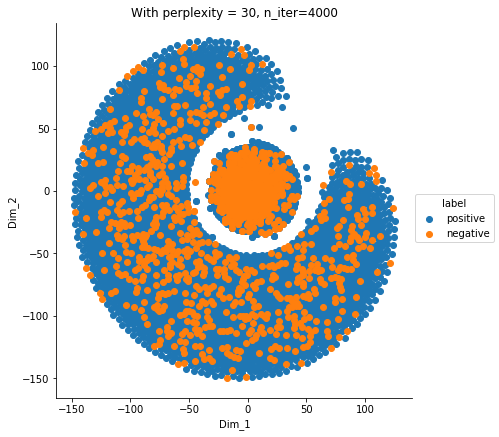

In [48]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, n_iter=4000')
plt.show()

#### WITH PERPLEXITY = 40 & ITERATIONS = 4000 

In [49]:
model = TSNE(n_components=2, random_state=0, perplexity=40,  n_iter=4000)
tsne_data = model.fit_transform(standardized_data)

In [50]:
tsne_dataa = np.vstack((tsne_data.T, label)).T # concatenating the data and label and storing in tsne_data.

# Making a new dataframe with concatenated data and 3 columns.
tsne_dff = pd.DataFrame(data=tsne_dataa, columns=("Dim_1", "Dim_2", "label"))

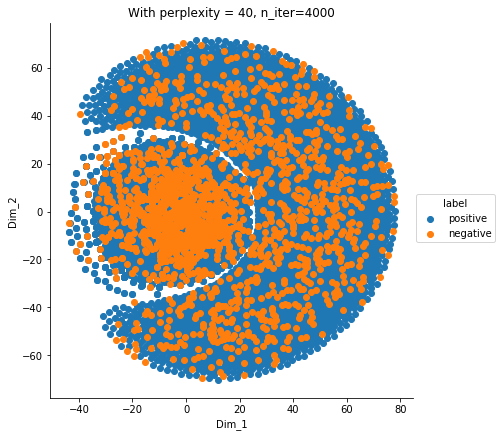

In [51]:
sn.FacetGrid(tsne_dff, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 40, n_iter=4000')
plt.show()

#### WITH PERPLEXITY = 50 & ITERATIONS = 5000 

In [52]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsn = model.fit_transform(standardized_data)

In [53]:
tsne_data = np.vstack((tsn.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

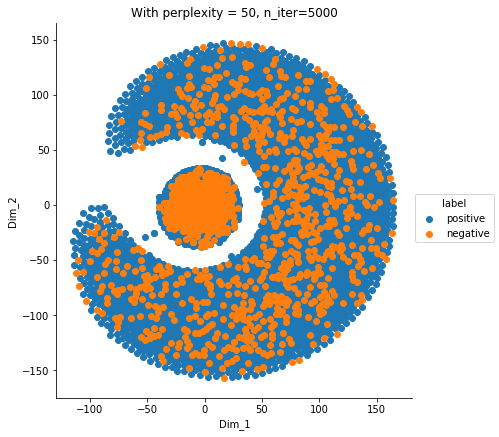

In [54]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()


## TF-IDF

![](https://lphinternetservices.com/images/TF-IDF-define.jpg)



### 1. CONVERTING REVIEWS INTO VECTORS USING tf-IDF

In [56]:
# Importing......
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#### UNI-GRAM

In [57]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
final_tf_idf = tf_idf_vect.fit_transform(data['CleanedText'].values)

In [58]:
# Shape of the converted data
final_tf_idf.get_shape()

(15000, 15948)

In [59]:
# getting all the features and storing into features
features = tf_idf_vect.get_feature_names()

# length of faetures
len(features) 

15948

#### TOP 10 FEATURES OF tf-IDF

In [119]:
def top_tfidf_feats(row, features, top_n=10):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,10)

In [120]:
# Top 10 tf-IDF features which has the the highest values.
top_tfidf

,feature,tfidf
0,chicken,0.434862
1,wing,0.364917
2,merito,0.324555
3,season,0.243002
4,chef,0.219932
5,sister,0.207345
6,use,0.202954
7,bake,0.149895
8,deduct,0.139606
9,hot,0.132305


### 2. REDUCING DIMENSIONS USING TRUNCATED SVD

In [62]:
svd = TruncatedSVD(n_components=12000)
finals=svd.fit_transform(final_tf_idf)

In [63]:
finals.shape

(15000, 12000)

### 3. STANDARDIZING THE DATA 

In [64]:
standardized_data = StandardScaler().fit_transform(finals)
print(standardized_data.shape)

(15000, 12000)


### 4. IMPLEMENTING t-SNE

#### WITH PERPLEXITY = 30 & ITERATIONS = 5000

In [65]:
model = TSNE(n_components=2, random_state=0, perplexity=30,  n_iter=5000)
tsne_data = model.fit_transform(standardized_data)

In [66]:
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

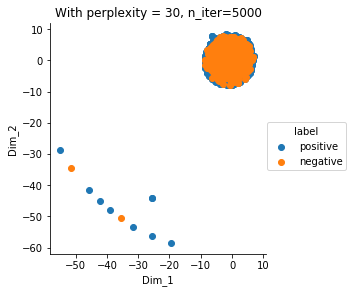

In [67]:
sn.FacetGrid(tsne_df, hue="label", size=4).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, n_iter=5000')
plt.show()

#### WITH PERPLEXITY = 40 & ITERATIONS = 5000

In [68]:
model = TSNE(n_components=2, random_state=0, perplexity=40,  n_iter=5000)
tsne_data = model.fit_transform(standardized_data)

In [69]:
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

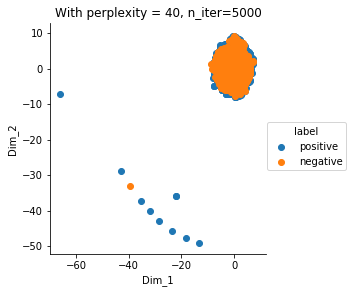

In [71]:
sn.FacetGrid(tsne_df, hue="label", size=4).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 40, n_iter=5000')
plt.show()

### Bi-Grams and n-Grams

In [72]:
freq_dist_positive=nltk.FreqDist(all_positive_words)
freq_dist_negative=nltk.FreqDist(all_negative_words)
print("Most Common Positive Words : ",freq_dist_positive.most_common(20))
print("Most Common Negative Words : ",freq_dist_negative.most_common(20))

Most Common Positive Words :  [(b'not', 146797), (b'like', 139429), (b'tast', 129047), (b'good', 112766), (b'flavor', 109624), (b'love', 107357), (b'use', 103888), (b'great', 103870), (b'one', 96726), (b'product', 91033), (b'veri', 90838), (b'tri', 86791), (b'tea', 83888), (b'coffe', 78814), (b'make', 75107), (b'get', 72125), (b'food', 64802), (b'would', 55568), (b'time', 55264), (b'buy', 54198)]
Most Common Negative Words :  [(b'not', 54378), (b'tast', 34585), (b'like', 32330), (b'product', 28218), (b'one', 20569), (b'flavor', 19575), (b'would', 17972), (b'tri', 17753), (b'veri', 17011), (b'use', 15302), (b'good', 15041), (b'coffe', 14716), (b'get', 13786), (b'buy', 13752), (b'order', 12871), (b'food', 12754), (b'dont', 11877), (b'tea', 11665), (b'even', 11085), (b'box', 10844)]


Here we can analyze that for the above two techniques bi-grams and tri-grams will be a good choice as the top 3 most occuring words are not, like, tast. It clearly shows that the polarity can be distinguished with the help of n-grams for eg. 'not like' vs 'like' or 'not tast' vs 'tast'.

#### NOTE -: 
As my Laptop does not have computational capability to visualize n-grams that's why i am not doing it otherwise i will recommend it as it is very important and helpfull.  

## WORD2VEC
![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-gender-relation.png?w=596)

## 1.  AVG WORD2VEC

In [73]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

C:\Users\15-AU008TX\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [74]:
# Storing all the reviews in list l4.
l4=[]
for i in range(15000):
    l1=data['CleanedText'].values[i]
    l2=str(l1)
    l4.append(l2)

### LIST OF WORDS

In [75]:
# making a list of words for each review.
i=0
list_of_sent=[] # list to store all the lists.
for sent in l4:
    filtered_sentence=[] # list to store each review.
    sent=cleanhtml(sent) # removing HTML tags.( WE DONT NEED THIS AS WE HAVE ALREADY REMOVED )
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence) # Appending all lists into list_of_sent.

In [78]:
# First Review without breaking into words. 
print(data['CleanedText'].values[0])

print("\n" + "********************Converted these sentences into a list of words each***********************\n ")

# First Review with breaking into words. 
print(list_of_sent[0])

b'began bake splenda found dad easter prepar sugarless ricotta tart splenda work beauti everyon agre didnt tast dad realli enjoy'

********************Converted these sentences into a list of words each***********************
 
['bbegan', 'bake', 'splenda', 'found', 'dad', 'easter', 'prepar', 'sugarless', 'ricotta', 'tart', 'splenda', 'work', 'beauti', 'everyon', 'agre', 'didnt', 'tast', 'dad', 'realli', 'enjoy']


### TRAINING OWN MODEL

In [79]:
# here we are training our own model with size = 100 and if a word has occured less than 3 times then it will not be considered.

w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=3,size=100, workers=4)

### AVG WORD2VEC ALGORITHM

In [80]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

### DIMENSIONS

In [81]:
print(len(sent_vectors))
print(len(sent_vectors[0]))

15000
100


In [82]:
# printing the first review in the form of vector converted using average word2vec.
list_of_sent[0])

[ 0.01691666 -0.05929298  0.2553373  -0.23562935 -0.15260898  0.13839592
 -0.38101317  0.35276119 -0.37364094  0.24207136  0.09639507  0.03494798
 -0.13236241 -0.1434509   0.15976575  0.55988797  0.22119948  0.33592226
  0.06084981 -0.39920572  0.2732426   0.42406231  0.11230132 -0.60084948
  0.14019787  0.10445481 -0.02890103  0.2878226   0.56634975 -0.24670461
  0.05264086 -0.49834135  0.06054737 -0.03505843 -0.30768734  0.04443214
  0.0548906   0.2110297   0.18167947  0.10060769 -0.11164003  0.2172875
 -0.441027   -0.19969545 -0.3216253  -0.36576125 -0.26644161 -0.09623845
  0.15204012  0.09621255  0.02993666  0.17945936  0.30567686  0.27409015
  0.06807082  0.06592014 -0.31846315 -0.01574818 -0.17849954 -0.06704892
  0.12325384  0.2683333  -0.05758626  0.11110303 -0.3675947   0.01364155
 -0.35927946  0.22959239  0.24582771  0.44929229  0.16238013 -0.15384761
  0.35764248  0.11231711 -0.18444578  0.14267719 -0.29184409 -0.18093142
 -0.29623454 -0.20051445 -0.05188099  0.30856913 -0.

### STANDARDIZING THE DATA

In [83]:
standardized_data = StandardScaler().fit_transform(sent_vectors)
print(standardized_data.shape)

(15000, 100)


In [84]:
# printing data after standardization.
print(standardized_data[0])

[-0.37641697  0.00379937 -0.4099925  -0.21530394  0.53906829  0.00266256
  0.14108888  0.8787923  -0.67534536  0.46503732  0.74201146 -0.46180755
  0.46379195 -0.68715711 -0.13508748 -0.35055019  0.34016386  0.75621951
  0.48054626 -0.41023727 -0.53764783 -0.30297389  0.39288309 -0.96335884
  0.38098612 -0.63518494 -0.12480502  0.68705522 -0.32268288  0.03188991
  0.18772899  0.1305908   0.55993023 -0.12944815 -0.20152085  0.20157551
 -0.50767517  0.12291567  0.27555491  1.00951627 -0.40130441 -0.84177371
 -0.38420047  0.11386184 -0.34792421 -0.14955937  0.12176037 -0.87853536
 -1.00226392  0.5146859   0.88067613  0.81857441  0.14953498  0.41863424
 -0.29682638 -0.41193016  0.09110732 -0.17068826  0.2176116   0.0695632
  0.58136586 -0.33289047  0.73101997 -0.78715814  0.10081961  0.63637054
  0.74764184 -0.56167281  0.31316359  0.07080412 -0.70466181 -0.41027993
 -1.33516525  0.74580242 -0.26150093  0.08682997  0.66507549  0.56306726
 -0.91819335 -0.72444956 -0.01115545  0.81218061 -0.

### IMPLEMENTING t-SNE

#### WITH PERPLEXITY = 30 AND ITERATIONS = 1000

In [85]:
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(standardized_data)

In [86]:
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

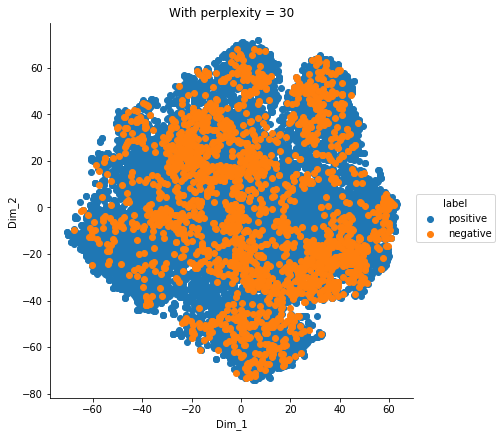

In [88]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30')
plt.show()

#### WITH PERPLEXITY = 40 AND ITERATIONS = 5000

In [89]:
model = TSNE(n_components=2, random_state=0, perplexity=40,  n_iter=5000)
tsne_data1 = model.fit_transform(standardized_data)

In [90]:
tsne_data1 = np.vstack((tsne_data1.T, label)).T
tsne_df1 = pd.DataFrame(data=tsne_data1, columns=("Dim_1", "Dim_2", "label"))

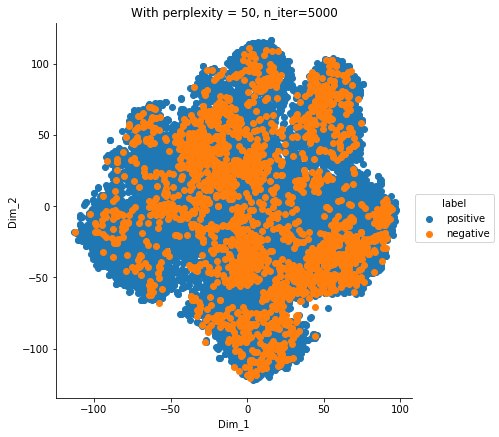

In [91]:
sn.FacetGrid(tsne_df1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

## 2. TF-IDF WORD2VEC

### 1. CONVERTING REVIEWS INTO VECTORS USING tf-IDF

In [97]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
final_tf_idf = tf_idf_vect.fit_transform(data['CleanedText'].values)

In [98]:
final_tf_idf.get_shape()

(15000, 15948)

### 2. TRAINING OWN MODEL

In [101]:
# training our own model with a minimum count of 2 and size = 200.
model=gensim.models.Word2Vec(list_of_sent,min_count=2,size=200, workers=4)

### 3. APPLYING ALGORITHM 

In [102]:
tfidf_feat = tf_idf_vect.get_feature_names()

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(200) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [103]:
# printing the total rows and dimension of our dataset.
print(len(tfidf_sent_vectors))
print(len(tfidf_sent_vectors[0]))

15000
200


In [104]:
# printing the first review after converting it with tf-idf word2vec.
print(tfidf_sent_vectors[0])

[-0.05272193  0.02460574  0.15495855 -0.1076625  -0.03988342  0.13330324
 -0.25461623  0.11468673 -0.13033085  0.13340438  0.03186777  0.04339993
 -0.09635381 -0.04558658  0.14216576  0.26510486  0.12788176  0.16703331
  0.00597737 -0.13787832  0.09174509  0.28835291  0.08041841 -0.275605
  0.09094652  0.1400303   0.06708916  0.12640765  0.39014485 -0.0269935
 -0.00802063 -0.22718674  0.02052954 -0.02710479 -0.11937802  0.02758064
  0.04803078  0.146434    0.15521229  0.0922859  -0.0312191   0.18561093
 -0.27404617 -0.10556592 -0.1007752  -0.1592612  -0.12884658  0.0364384
  0.12733579  0.06545347 -0.01221602  0.12514368  0.10874527  0.08301507
  0.06092134  0.00893287 -0.21983153 -0.05862266 -0.08040858 -0.0821798
  0.03982956  0.17672538 -0.02387716  0.08025233 -0.20007474  0.04106452
 -0.16215722  0.22323133  0.10676684  0.27169872  0.07902985 -0.14342097
  0.26971663 -0.01586829 -0.08247654  0.03677811 -0.19433731 -0.09756764
 -0.15006303 -0.10561131 -0.06068128  0.19215108 -0.1050

### 4. STANDARDIZING THE DATA

In [105]:
standardized_data = StandardScaler().fit_transform(tfidf_sent_vectors)
print(standardized_data.shape)

(15000, 200)


In [114]:
# printing the first review after standardization.
print(standardized_data[0])

[-0.08039604  0.47511178 -0.29541563  0.25528809  0.48217398 -0.27891323
  0.38745995 -0.36380333 -0.26883984 -0.05315342  0.07695447 -0.09673761
  0.28825278 -0.24652552 -0.20845331 -0.63735606 -0.24450707  0.10341463
 -0.22557307  0.51174036 -0.58260325 -0.5026278   0.21085417  0.25633367
  0.18525752 -0.44607921 -0.14722198 -0.17200961 -0.17079245  0.35841461
 -0.14369329  0.37688038  0.29013928 -0.27082006  0.07557656  0.45808925
 -0.32064159  0.10770307 -0.4596729   0.5564694  -0.05132871 -0.74256263
  0.26666526  0.01640779  0.05086429  0.51834421  0.59354348 -0.76277749
 -0.79840297  0.22440618  0.38306887  0.266829   -0.14448832 -0.35417564
 -0.06003498 -0.38230691  0.63336214 -0.41068172  0.15592676 -0.15114311
  0.0609037  -0.40306024  0.48873434 -0.75247967  0.3311975   0.29349439
  0.99945032 -0.75284615 -0.04372342 -0.5260713  -0.64637385 -0.12330313
 -1.35604382  0.14841547  0.088101    0.01206215  0.89785709  0.22763698
 -0.38079906 -0.09986377  0.12565583 -0.01392087 -0

### 5. IMPLEMENTING t-SNE

#### WITH PERPLEXITY = 30 & ITERATIONS = 1000

In [106]:
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(standardized_data)

In [107]:
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

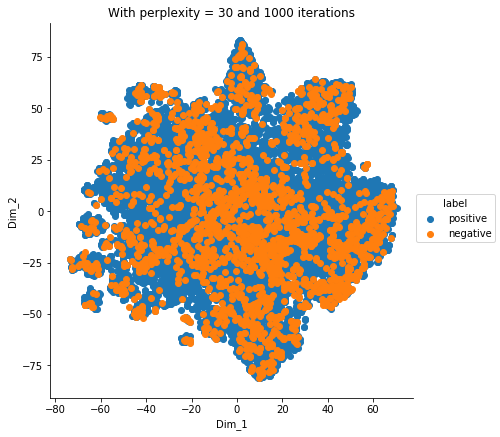

In [109]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30 and 1000 iterations')
plt.show()

#### WITH PERPLEXITY = 30 & ITERATIONS = 5000

In [110]:
model = TSNE(n_components=2, random_state=0, perplexity=30,  n_iter=5000)
tsne_data = model.fit_transform(standardized_data)

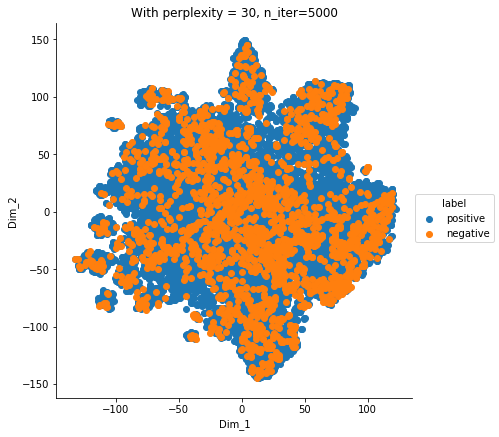

In [111]:
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, n_iter=5000')
plt.show()

#### WITH PERPLEXITY = 40 & ITERATIONS = 1000

In [112]:
model = TSNE(n_components=2, random_state=0, perplexity=40)
tsne_data = model.fit_transform(standardized_data)

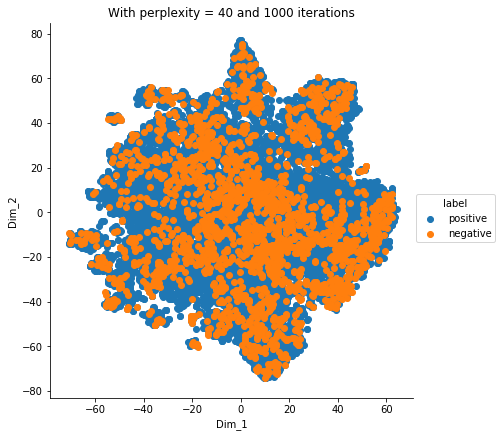

In [113]:
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 40 and 1000 iterations')
plt.show()

## CONCLUSION

1. In all the techniques the negative points are overlapping on positive points.
2. We can say by visualization that the positive and negative points are not linearly seperable.
3. I have taken less points i.e 15k so going to any decision is inappropriate as maybe on 364k points this data may be seperable.